# INDIA COVID SITUATION ANALYSIS

TODO -In this course project we will analyze the condition of corona in india. We will apply all the concepts learnt from jovian library , we will visualize as well as extract the data from the csv file downloaded from kaggle.com.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rachitsoni
Your Kaggle Key: ········


100%|██████████| 3.08M/3.08M [00:00<00:00, 59.1MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './covid19-corona-virus-india-dataset'

In [5]:
import os
os.listdir(data_dir)

['patients_data.csv',
 'README.md',
 'complete.csv',
 'web_scraping.ipynb',
 'tests_state_wise.csv',
 'nation_level_daily.csv',
 'api.ipynb',
 'district_level_latest.csv',
 'state_level_latest.csv',
 'tests_day_wise.csv',
 'state_level_daily.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "INDIA CORONA CASES DATA ANALYSIS" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rachukabir123/india-corona-cases-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rachukabir123/india-corona-cases-data-analysis


'https://jovian.ml/rachukabir123/india-corona-cases-data-analysis'

## Data Preparation and Cleaning

**TODO** - Here we are analyzing the data and describing and gaining some info about it.



In [11]:
import pandas as pd

In [12]:
india_corona_cases_df=pd.read_csv(data_dir+"/complete.csv")

In [13]:
india_corona_cases_df

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050.0,589,52103.0,2092,0,1289
4688,2020-08-06,Tripura,23.9408,91.9882,5725.0,31,3793.0,97,0,68
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388.0,1857,60558.0,4078,0,3287
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254.0,98,5233.0,246,0,386


In [14]:
india_corona_cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4692 non-null   object 
 1   Name of State / UT         4692 non-null   object 
 2   Latitude                   4692 non-null   float64
 3   Longitude                  4692 non-null   float64
 4   Total Confirmed cases      4692 non-null   float64
 5   Death                      4692 non-null   object 
 6   Cured/Discharged/Migrated  4692 non-null   float64
 7   New cases                  4692 non-null   int64  
 8   New deaths                 4692 non-null   int64  
 9   New recovered              4692 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 366.7+ KB


In [15]:
row=india_corona_cases_df.shape[0]
row

4692

In [16]:
column=india_corona_cases_df.shape[1]
column

10

In [17]:
india_corona_cases_df.describe()

,Latitude,Longitude,Total Confirmed cases,Cured/Discharged/Migrated,New cases,New deaths,New recovered
count,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.0,4692.000000
mean,23.185327,81.451837,11393.925192,6908.130648,418.643009,0.0,283.069054
std,6.635913,6.959475,37208.600846,23390.671258,1259.748923,0.0,947.925811
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,-1.000000
25%,18.112400,76.271100,39.000000,9.000000,1.000000,0.0,0.000000
50%,23.940800,79.019300,619.000000,197.500000,26.000000,0.0,8.000000
75%,28.218000,85.313100,5233.000000,2736.000000,210.250000,0.0,119.000000
max,34.299600,94.727800,468265.000000,305521.000000,18366.000000,0.0,13401.000000


In [18]:
india_corona_cases_df.isnull().any()


Date                         False
Name of State / UT           False
Latitude                     False
Longitude                    False
Total Confirmed cases        False
Death                        False
Cured/Discharged/Migrated    False
New cases                    False
New deaths                   False
New recovered                False
dtype: bool

In [19]:
#No null values in my data set


In [20]:
india_corona_cases_df['total cases']=india_corona_cases_df['Total Confirmed cases'].cumsum()

In [34]:
india_corona_cases_df.head(5)

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,total cases,total deaths,month
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,1.0,0,1
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,2.0,00,1
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0,4.0,000,2
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0,7.0,0000,2
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0,10.0,00000,2


In [35]:
india_corona_cases_df['month'] =pd.DatetimeIndex(india_corona_cases_df['Date']).month
india_corona_cases_df.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,total cases,total deaths,month
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,1.0,0,1
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,2.0,00,1
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0,4.0,000,2
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0,7.0,0000,2
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0,10.0,00000,2


In [25]:
india_corona_cases_df.groupby('month')[['New cases']].sum()

,New cases
month,
1,0
2,2
3,1303
4,31696
5,143597
6,382975
7,1079034
8,325666


In [26]:
import jovian

In [27]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rachukabir123/india-corona-cases-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rachukabir123/india-corona-cases-data-analysis


'https://jovian.ml/rachukabir123/india-corona-cases-data-analysis'

## Exploratory Analysis and Visualization

**TODO** - Here we are seeing and visualizing relationship between the different columns in the corona dataset.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [28]:
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - taking the mean , range and sum of numeric column(New cases)

In [29]:
mean1=india_corona_cases_df['New cases'].mean()
sum1=india_corona_cases_df['New cases'].sum()
range1=india_corona_cases_df['New cases'].max()-india_corona_cases_df['New cases'].min()

In [30]:
mean1

418.6430093776641

In [31]:
sum1

1964273

In [32]:
range1

18366

**TODO** - Plotting the histogram of different numeric column

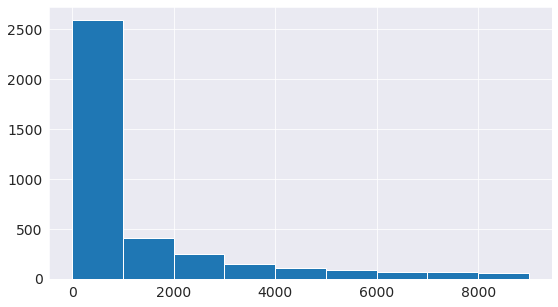

In [47]:
plt.hist(india_corona_cases_df['Total Confirmed cases'],bins=np.arange(0,10000,1000));

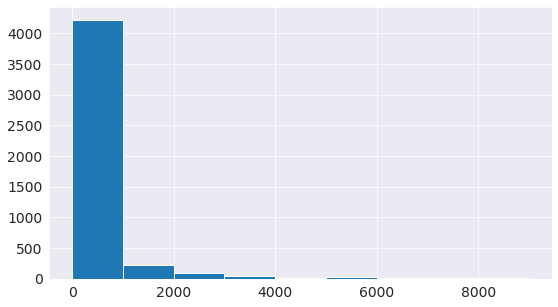

In [48]:
plt.hist(india_corona_cases_df['New cases'],bins=np.arange(0,10000,1000));

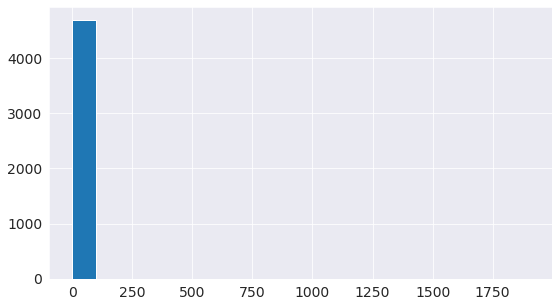

In [51]:
plt.hist(india_corona_cases_df['New deaths'],bins=np.arange(0,2000,100));

**TODO** - Plotting the scatter plot of new cases according to different states

In [53]:
india_corona_cases_df['Name of State / UT'].unique()

array(['Kerala', 'Delhi', 'Telengana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Union Territory of Ladakh',
       'Karnataka', 'Maharashtra', 'Punjab',
       'Union Territory of Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Union Territory of Chandigarh', 'Gujarat',
       'Chandigarh', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Nagaland',
       'Telangana', 'Telangana***'], dtype=object)

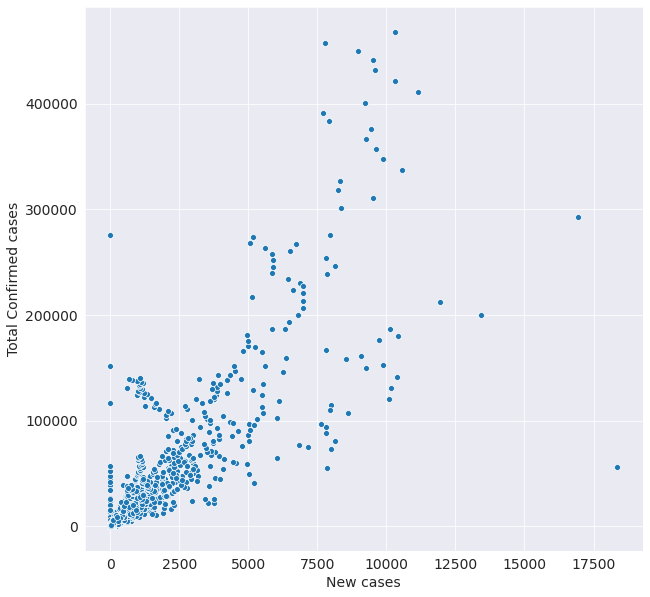

In [73]:
plt.figure(figsize=(10,10))
sns.scatterplot(india_corona_cases_df['New cases'],india_corona_cases_df['Total Confirmed cases']);

**TODO** - Plotting the bar graph of new cases

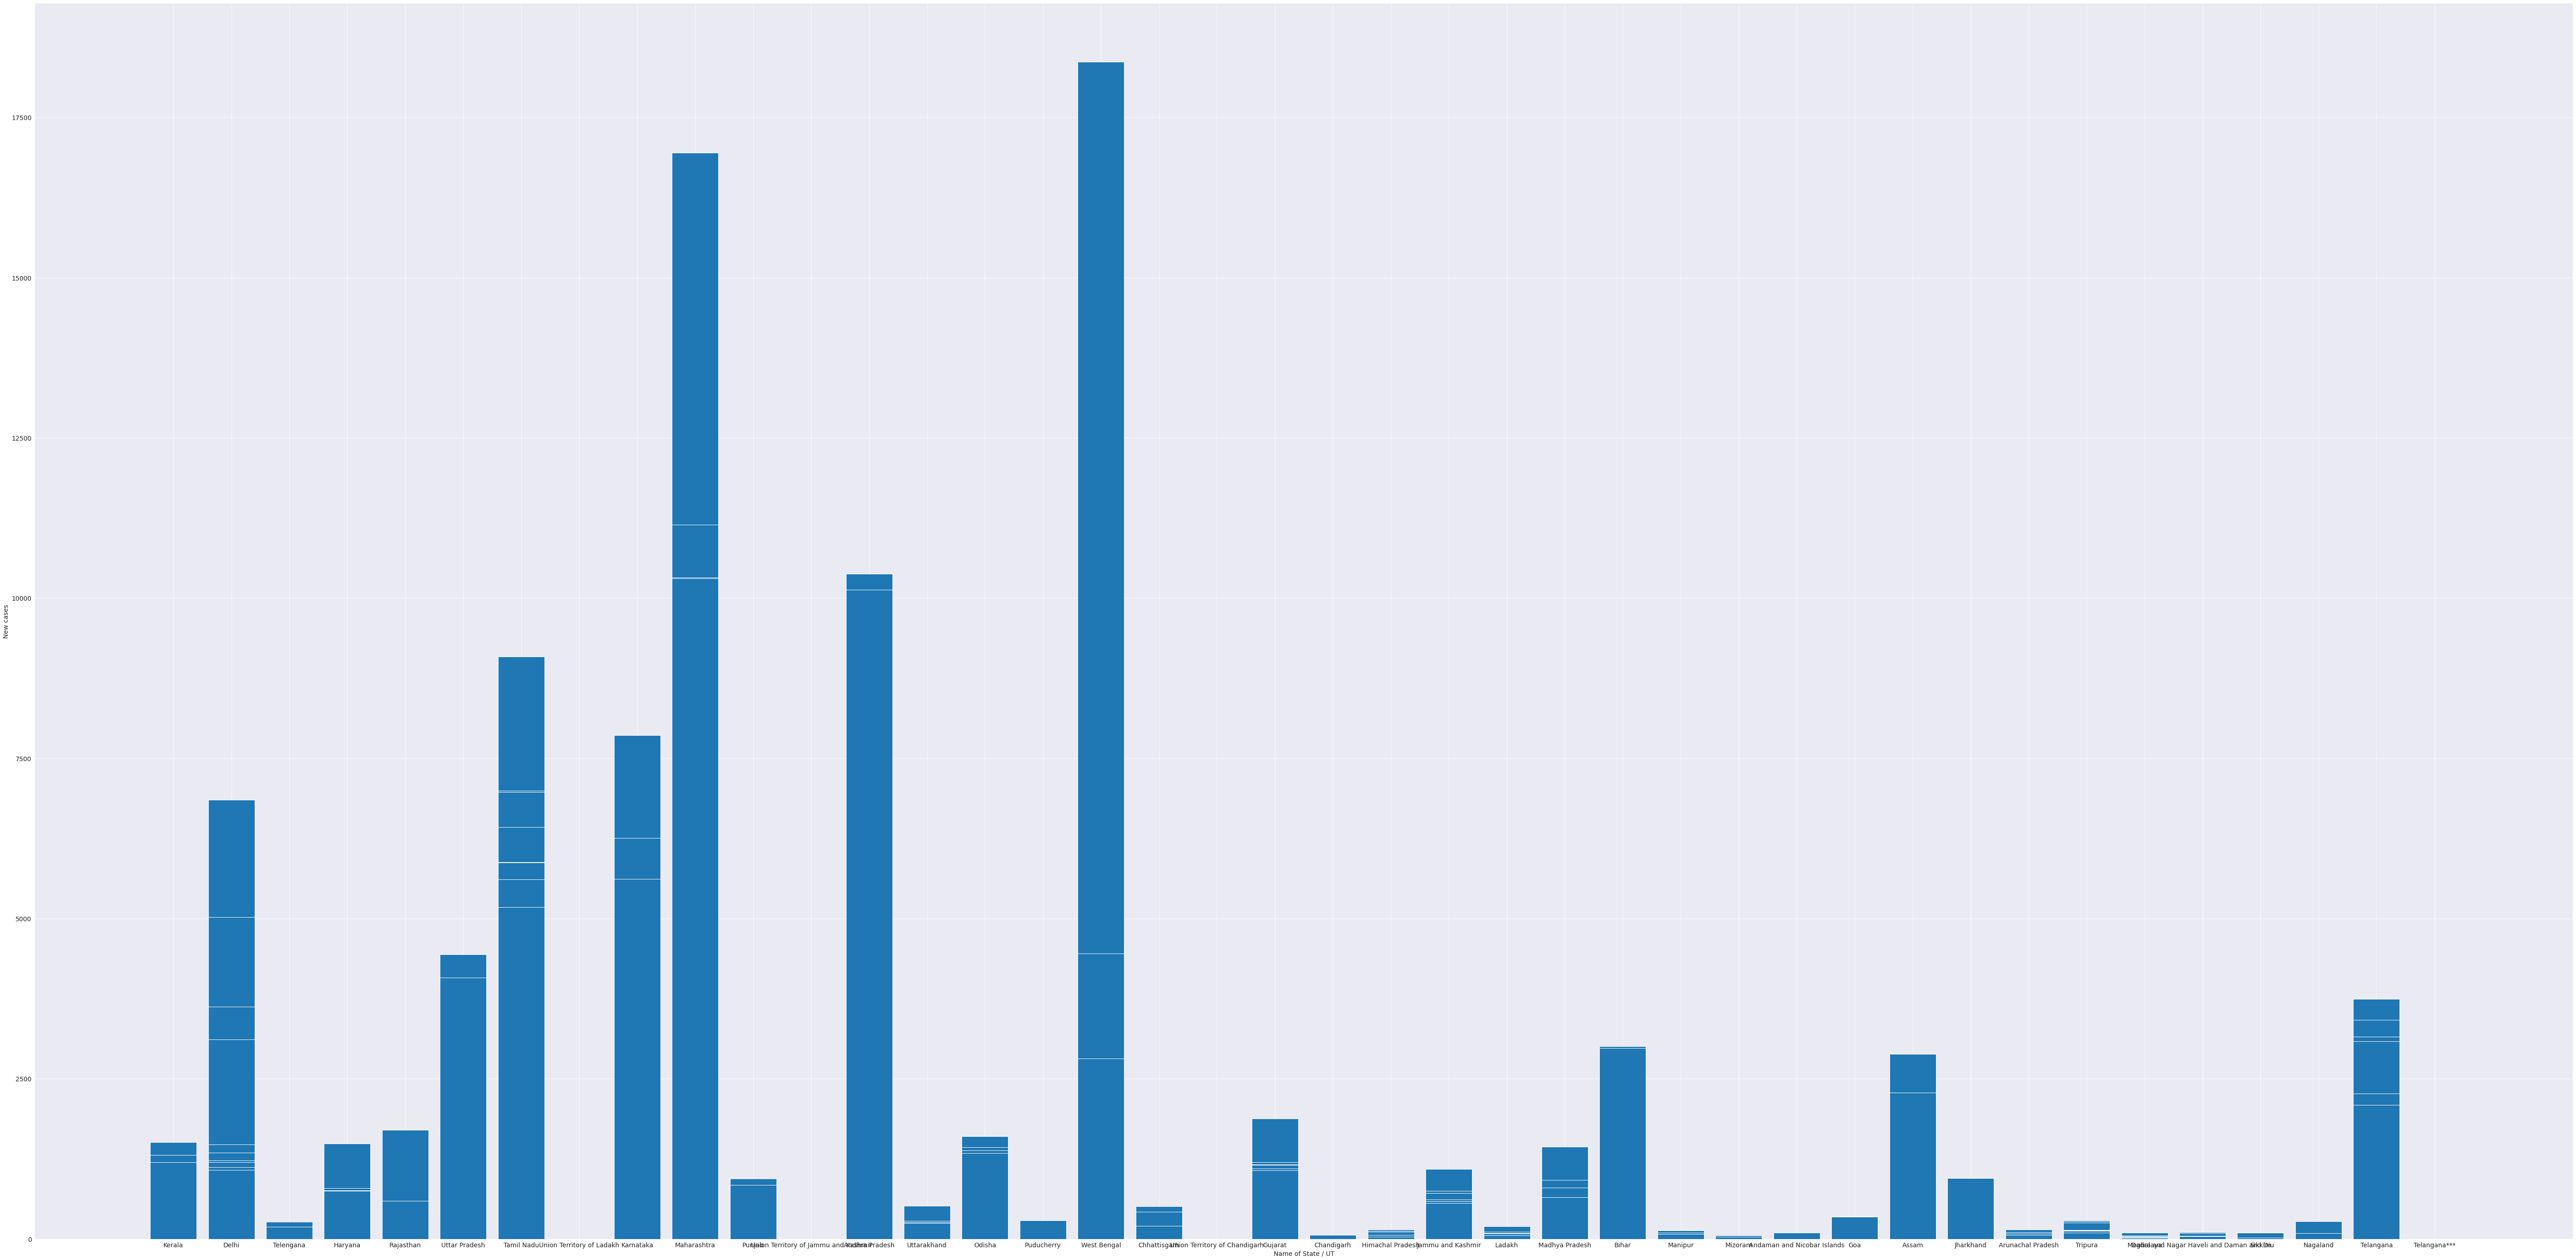

In [92]:
plt.figure(figsize=(100,50))
plt.xlabel('Name of State / UT')
plt.ylabel('New cases')
plt.bar(india_corona_cases_df['Name of State / UT'],india_corona_cases_df['New cases']);


**TODO** - Plotting the line chart of new cases according to the different states

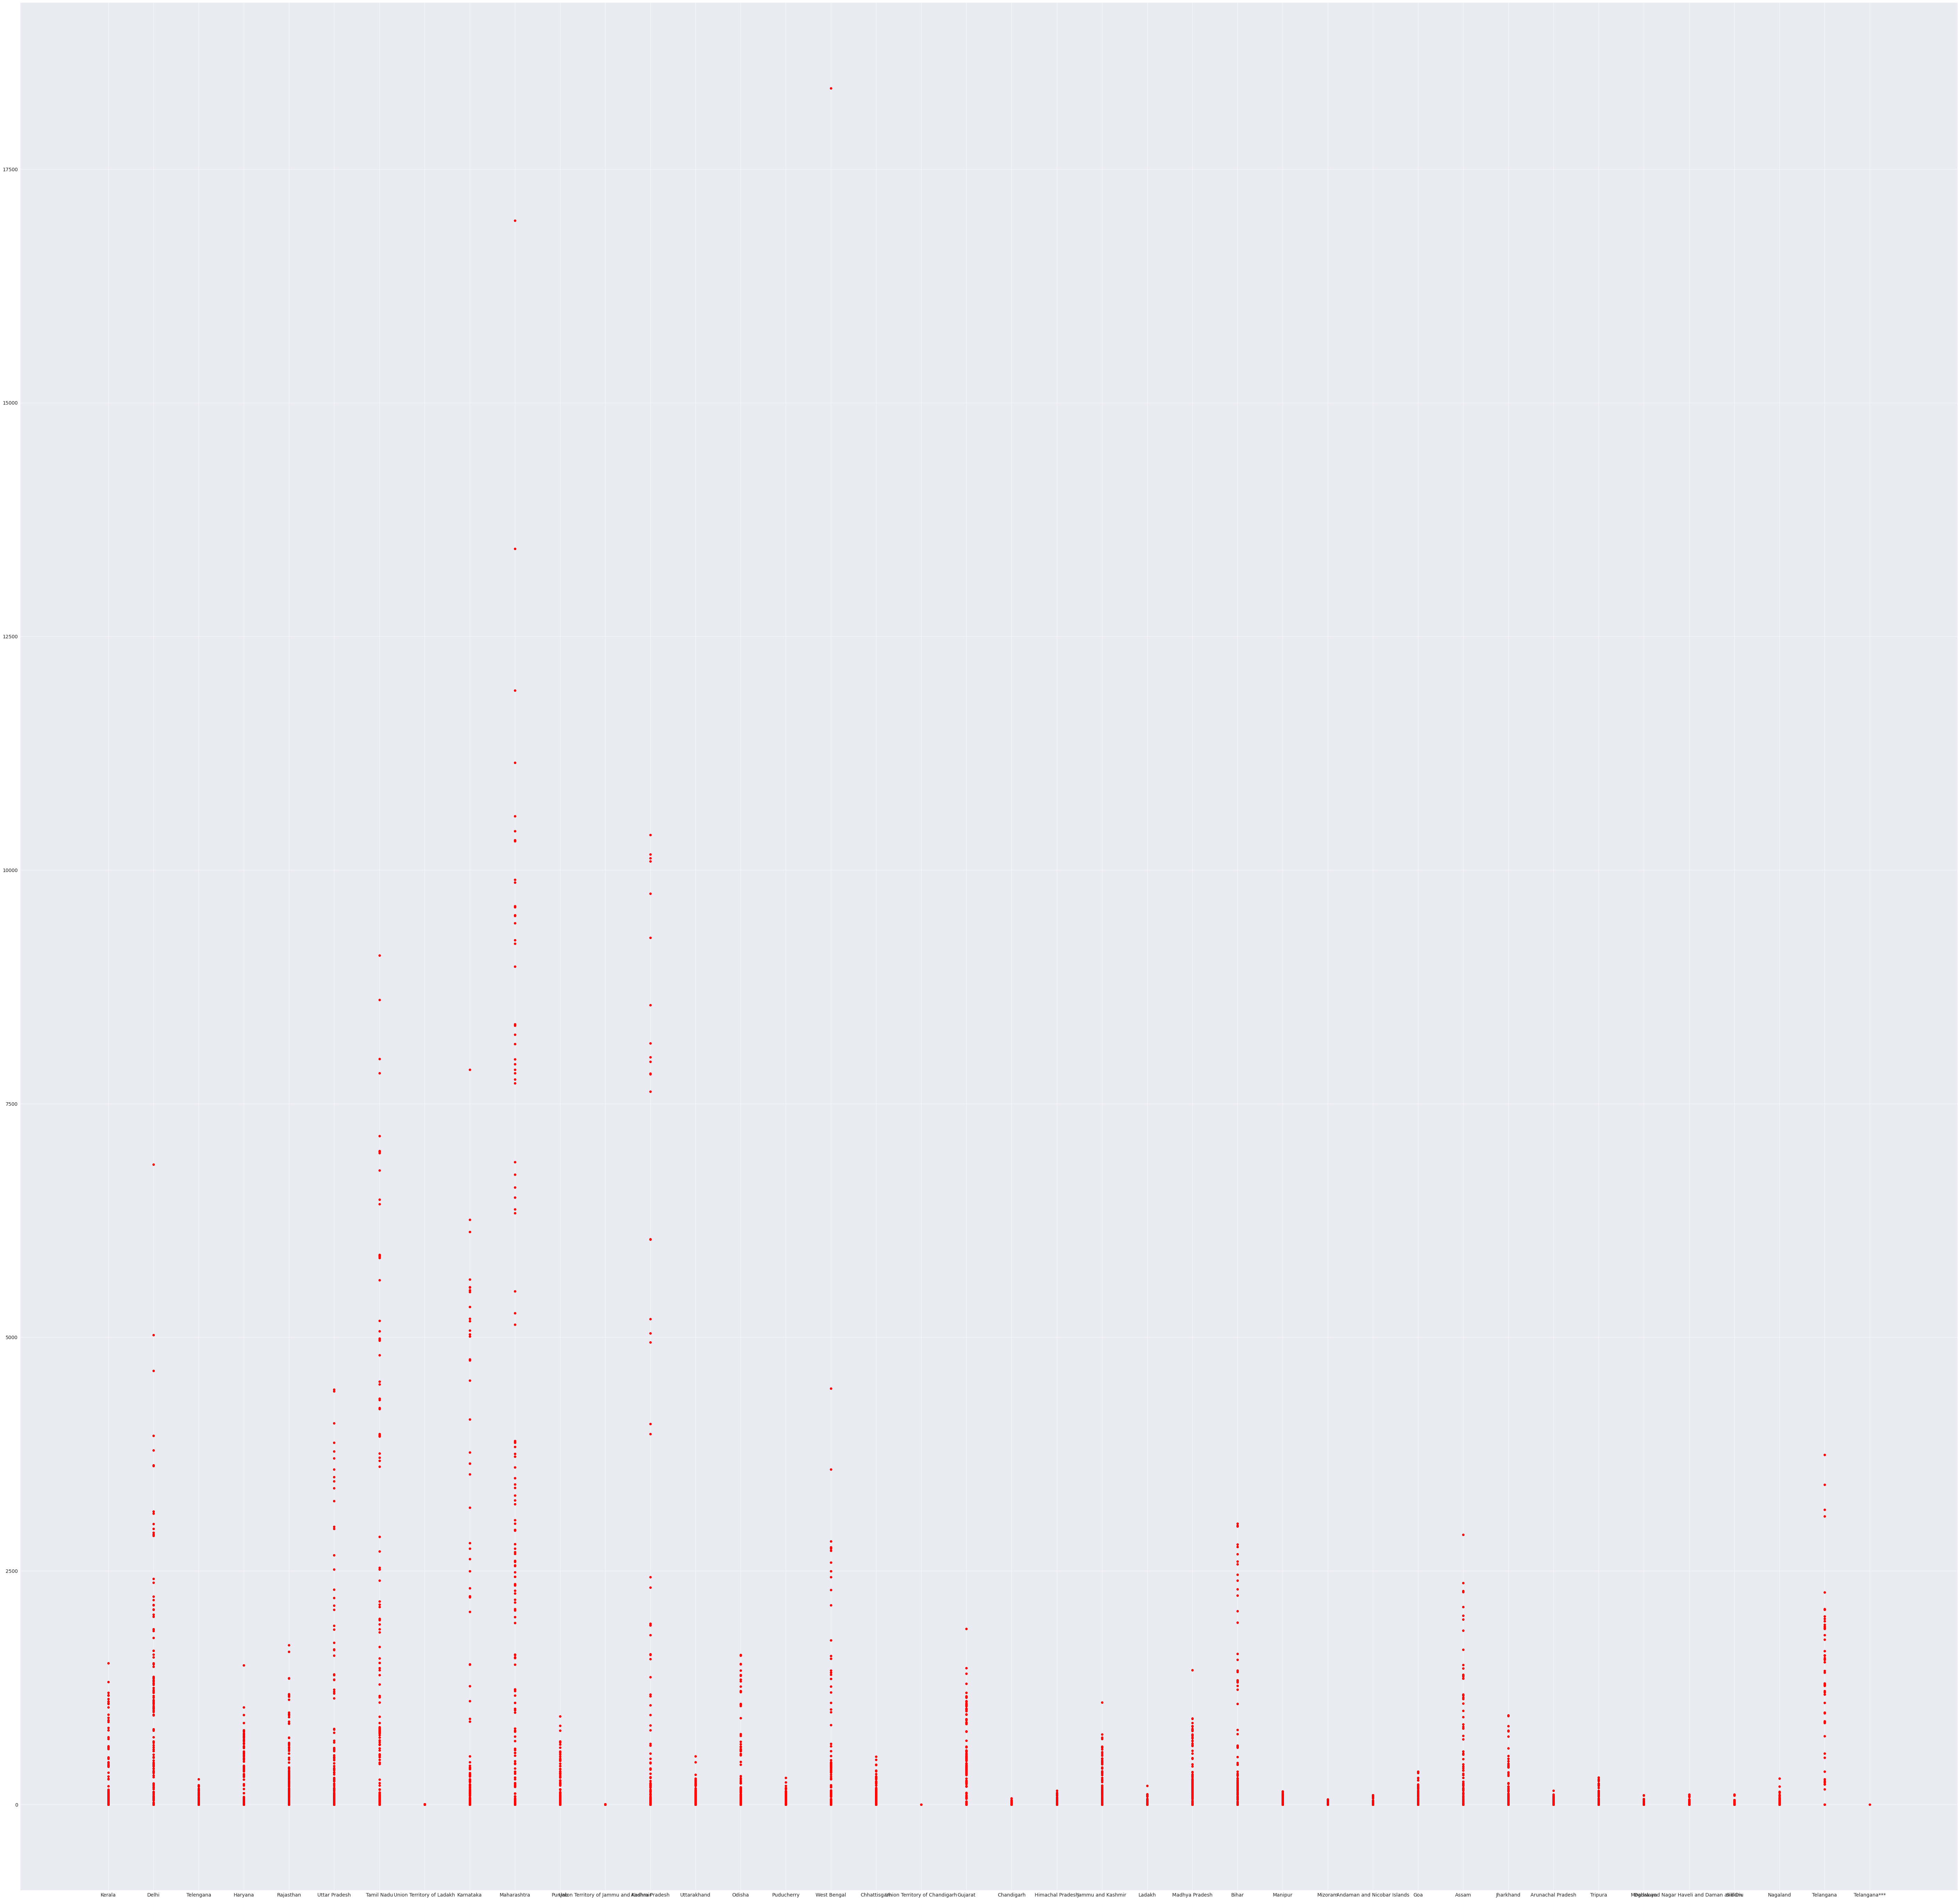

In [96]:
plt.figure(figsize=(100,100))
plt.plot(india_corona_cases_df['Name of State / UT'],india_corona_cases_df['New cases'],'or');

Let us save and upload our work to Jovian before continuing

In [97]:
import jovian

In [98]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rachukabir123/india-corona-cases-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rachukabir123/india-corona-cases-data-analysis


'https://jovian.ml/rachukabir123/india-corona-cases-data-analysis'

## Asking and Answering Questions

TODO - Different questions related to corona dataset



#### Q1: Comparison of cured patient vs new cases

In [108]:
data_df=india_corona_cases_df[['New cases','Name of State / UT','Cured/Discharged/Migrated']].sample(10)
data_df

,New cases,Name of State / UT,Cured/Discharged/Migrated
2582,4,Ladakh,47.0
3469,3940,Tamil Nadu,45537.0
3757,33,Arunachal Pradesh,120.0
757,40,Rajasthan,21.0
1663,0,Dadra and Nagar Haveli and Daman and Diu,0.0
3982,0,Ladakh,964.0
4,0,Kerala,0.0
12,0,Kerala,0.0
2120,0,Arunachal Pradesh,1.0
503,1,Chhattisgarh,0.0


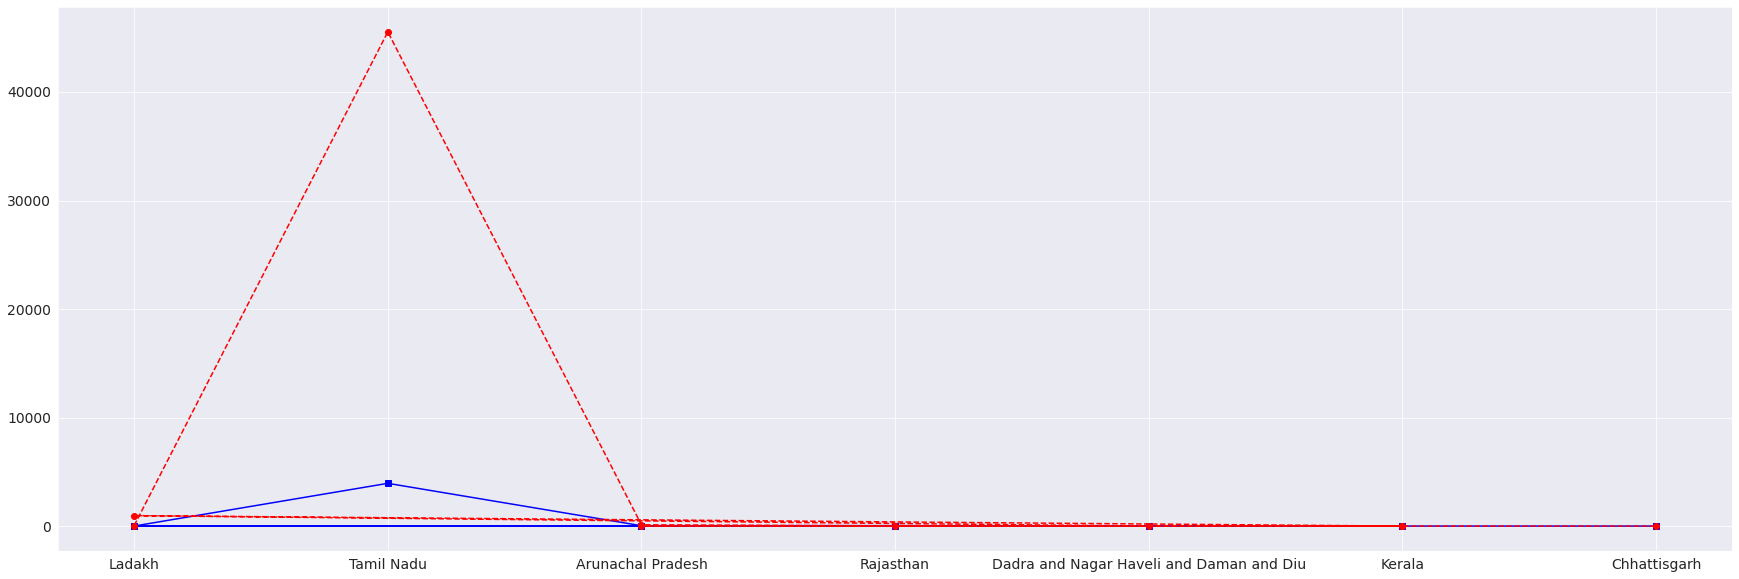

In [109]:
plt.figure(figsize=(30,10))
plt.plot(data_df['Name of State / UT'],data_df['New cases'], 's-b')
plt.plot(data_df['Name of State / UT'], data_df['Cured/Discharged/Migrated'] , 'o--r')

#### Q2: Highest confirmed cases in which state?


In [112]:
highest_cases=india_corona_cases_df[india_corona_cases_df['Total Confirmed cases']==india_corona_cases_df['Total Confirmed cases'].max()]
highest_cases

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,total cases,total deaths,month
4676,2020-08-06,Maharashtra,19.7515,75.7139,468265.0,16476,305521.0,10309,0,6165,52793184.0,0000000000000000000000000000000000000000000000...,8


#### Q3: Which day of the week has maximum cases?


In [115]:
india_corona_cases_df['Day'] =pd.DatetimeIndex(india_corona_cases_df['Date']).weekday
india_corona_cases_df.groupby('Day')[['New cases']].sum()

,New cases
Day,
0,258416
1,295221
2,255741
3,320197
4,211087
5,301569
6,322042


#### Q4: What are the total cases confirmed till date ?


In [117]:
Total_Cases_confirmed_tilldate=india_corona_cases_df['Total Confirmed cases'].sum()
Total_Cases_confirmed_tilldate

53460297.0

#### Q5:How many  Cured/Discharged/Migrated occurred each month?

In [121]:
india_corona_cases_df['month'] =pd.DatetimeIndex(india_corona_cases_df['Date']).month
month_wise=india_corona_cases_df.groupby('month')[['Cured/Discharged/Migrated']].sum()
month_wise

,Cured/Discharged/Migrated
month,
1,0.0
2,0.0
3,805.0
4,73724.0
5,1132422.0
6,5383644.0
7,18555088.0
8,7267266.0


Let us save and upload our work to Jovian before continuing.

In [122]:
import jovian

In [123]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rachukabir123/india-corona-cases-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rachukabir123/india-corona-cases-data-analysis


'https://jovian.ml/rachukabir123/india-corona-cases-data-analysis'

## Inferences and Conclusion

**TODO** -I understood the concepts of pandas , numpy , matplotlib , seaborn , data visulaization etc.

In [124]:
import jovian

In [125]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rachukabir123/india-corona-cases-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rachukabir123/india-corona-cases-data-analysis


'https://jovian.ml/rachukabir123/india-corona-cases-data-analysis'

## References and Future Work

**TODO** - extracting data from different data sets which can be used further for analyzing various projects.


> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [32]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'